# LOAN STATUS PREDICTION

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [84]:
df = pd.read_csv('loan_data.csv')

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [86]:
df.shape

(381, 13)

In [87]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [88]:
df.drop('Loan_ID', axis=1, inplace=True)

In [89]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [90]:
df.duplicated().sum()

0

In [91]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = le.fit_transform(df['Dependents'])

In [93]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [94]:
df = df.dropna()

In [95]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [96]:
df.shape

(340, 12)

In [97]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [98]:
df['Married'].value_counts()

Married
1    201
0    139
Name: count, dtype: int64

In [99]:
df['Education'].value_counts()

Education
0    252
1     88
Name: count, dtype: int64

In [100]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [101]:
print(df['Gender'].dtype)
print(df['Married'].dtype)
print(df['Dependents'].dtype)
print(df['Education'].dtype)
print(df['Self_Employed'].dtype)
print(df['ApplicantIncome'].dtype)
print(df['CoapplicantIncome'].dtype)
print(df['LoanAmount'].dtype)
print(df['Loan_Amount_Term'].dtype)
print(df['Credit_History'].dtype)
print(df['Property_Area'].dtype)
print(df['Loan_Status'].dtype)


int32
int32
int32
int32
int32
int64
float64
float64
float64
float64
int32
int32


### DATA VISUALIZATION

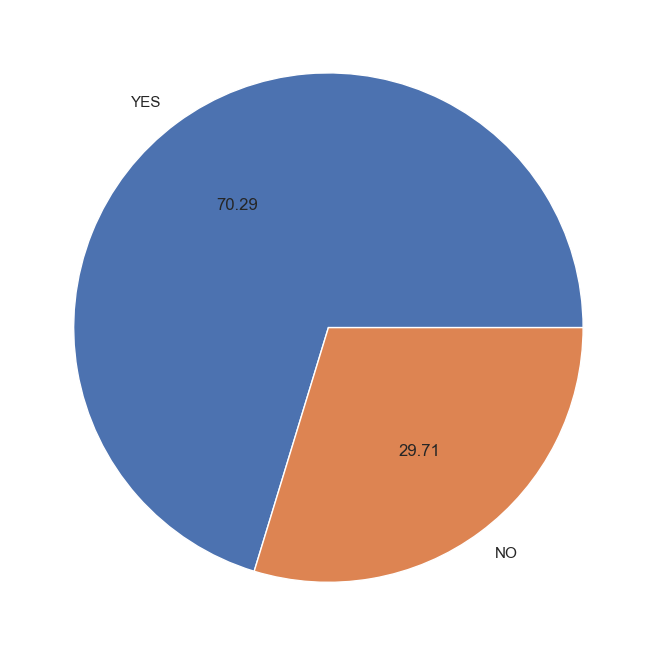

In [102]:
plt.pie(df['Loan_Status'].value_counts(), labels=['YES','NO'], autopct="%0.2f")#autopct shows us percentage
plt.show()


<Axes: >

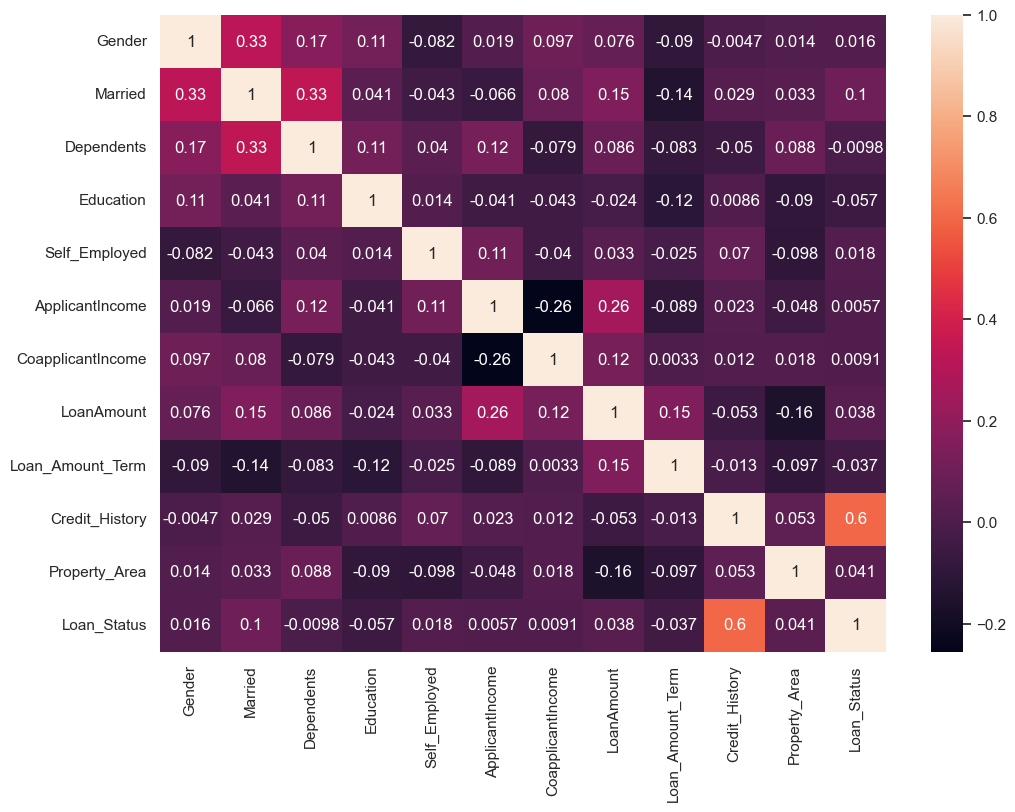

In [103]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
#finding correlation between features using heatmap
sns.heatmap(df.corr(), annot=True)

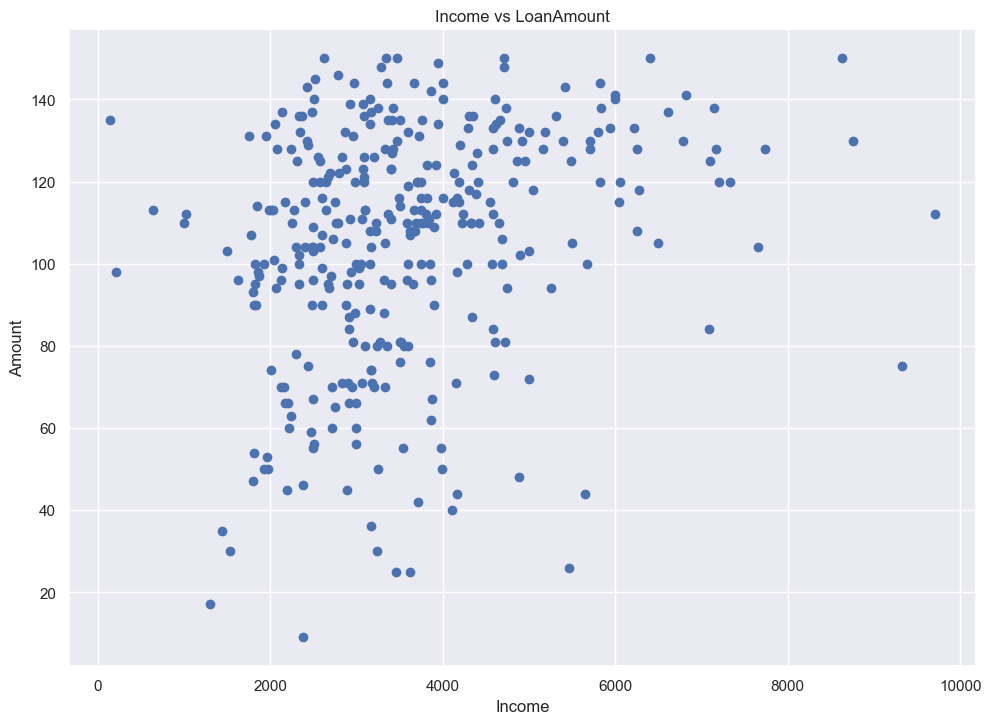

In [104]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Income')
plt.ylabel('Amount')
plt.title('Income vs LoanAmount')
plt.show()

### DATA SPLITTING

In [105]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
X_train_scaled

array([[ 0.44563426,  0.8430254 ,  0.19929817, ...,  0.25025055,
         0.43332773, -0.0877183 ],
       [ 0.44563426, -1.18620388, -0.71950016, ...,  0.25025055,
         0.43332773, -1.41323925],
       [ 0.44563426,  0.8430254 , -0.71950016, ..., -3.33228363,
         0.43332773, -0.0877183 ],
       ...,
       [ 0.44563426, -1.18620388, -0.71950016, ...,  0.25025055,
         0.43332773, -0.0877183 ],
       [ 0.44563426,  0.8430254 , -0.71950016, ...,  0.25025055,
         0.43332773, -0.0877183 ],
       [ 0.44563426,  0.8430254 , -0.71950016, ...,  0.25025055,
         0.43332773, -1.41323925]])

### MODEL TRAINING(ON NEURAL NETWORKS)
- Contains 2 hidden layers

In [109]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3379 - loss: 0.7385 - val_accuracy: 0.3273 - val_loss: 0.7641
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4079 - loss: 0.6877 - val_accuracy: 0.3636 - val_loss: 0.7424
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4431 - loss: 0.6898 - val_accuracy: 0.4909 - val_loss: 0.7213
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4609 - loss: 0.6930 - val_accuracy: 0.5091 - val_loss: 0.7011
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5758 - loss: 0.6687 - val_accuracy: 0.5273 - val_loss: 0.6838
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6051 - loss: 0.6469 - val_accuracy: 0.5455 - val_loss: 0.6677
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6410 - loss: 0.6345 - val_accuracy: 0.5818 - val_loss: 0.6529
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.6304 - val_accuracy: 0.6545 - val_loss: 0.6380

In [113]:
model.layers[0].get_weights()

[array([[-2.16990784e-01,  7.86219686e-02, -3.46696883e-01,
         -7.92235062e-02, -3.39344889e-01,  4.91056917e-03,
          2.25010261e-01,  3.12349319e-01, -2.65885592e-01,
         -1.11740135e-01, -2.00009085e-02],
        [-4.14296567e-01, -2.92148381e-01,  4.96484116e-02,
         -2.86178112e-01, -2.93803483e-01, -1.25155523e-01,
         -5.26414998e-02, -4.16220874e-01, -1.25069126e-01,
         -2.37094626e-01,  4.45323646e-01],
        [ 2.81906314e-02, -9.94481817e-02,  8.28940496e-02,
          4.52380359e-01,  2.45454103e-01,  5.92829473e-02,
         -3.06128144e-01,  4.34050202e-01,  2.06957310e-01,
          4.01648790e-01,  3.19109589e-01],
        [-2.89522350e-01, -8.41329060e-03,  3.31652045e-01,
         -4.74626392e-01,  2.48026192e-01, -5.54399908e-01,
         -1.90930158e-01, -2.53806889e-01,  3.42958957e-01,
         -2.12454066e-01, -4.88393575e-01],
        [ 2.33403787e-01, -1.84816346e-01, -5.40171146e-01,
          4.33544755e-01, -8.58764127e-02,  

In [114]:
import matplotlib.pyplot as plt

In [115]:
history.history

{'accuracy': [0.36866360902786255,
  0.41013824939727783,
  0.460829496383667,
  0.5069124698638916,
  0.5668202638626099,
  0.6129032373428345,
  0.6497696042060852,
  0.6820276379585266,
  0.7327188849449158,
  0.764976978302002,
  0.764976978302002,
  0.7880184054374695,
  0.7972350120544434,
  0.8018433451652527,
  0.8018433451652527,
  0.8018433451652527,
  0.8064516186714172,
  0.8156682252883911,
  0.8248847723007202,
  0.8248847723007202,
  0.8248847723007202,
  0.8248847723007202,
  0.8248847723007202,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8248847723007202,
  0.8248847723007202,
  0.8248847723007202,
  0.8248847723007202,
  0.8248847723007202,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8294931054115295,
  0.8341013789176941,
  0.8341013789176941,
  0.8341013789176941,
  0.8341013789176941,
  0.8341013789176941,

### MODEL EVALUATION 

In [116]:
max_values = {}
for key, value in history.history.items():
    max_values[key] = max(value)

print(max_values)

{'accuracy': 0.8709677457809448, 'loss': 0.7170069813728333, 'val_accuracy': 0.9272727370262146, 'val_loss': 0.764100968837738}


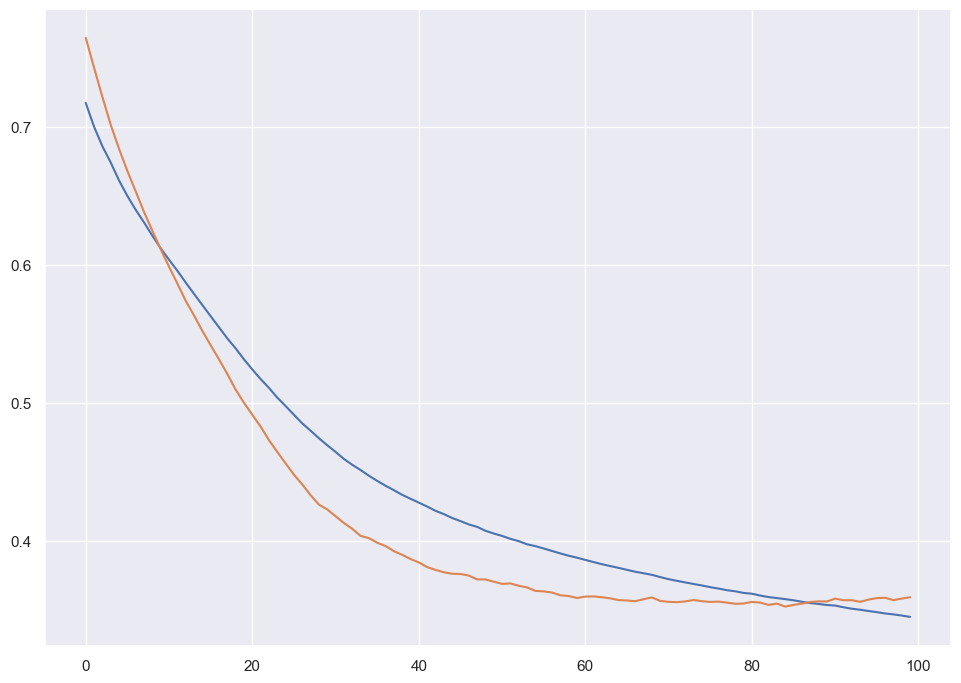

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

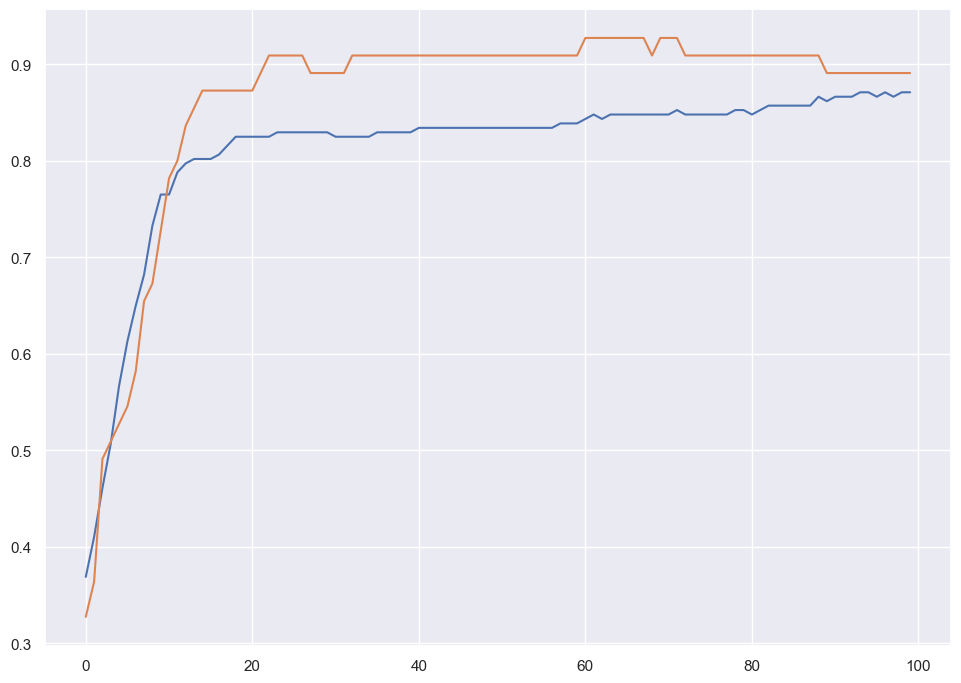

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])